> # **Nader Mohamed Elhadedy**

# PageRank from Scikit: Documentation
#### https://github.com/sknetwork-team/scikit-network/blob/master/docs/tutorials/ranking/pagerank.ipynb

# from IPython.display import SVG

In [1]:
import numpy as np
from IPython.display import SVG

In [2]:
pip install scikit-network

In [3]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.ranking import PageRank, BiPageRank
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

# **PageRank Algorithm**

In [4]:
def page_rank_algo(matrix, iterations=100, damp=0.85):
  import numpy as np

  N=matrix.shape[1]
  v_start=np.ones(N)/N
  v_start.reshape(N,1)
  epsilon = 0.0001

  M_hat=(damp * matrix + (1 - damp) / N)

  for i in range(iterations):
          v_end = M_hat.dot(v_start.T) # equals: M_hat @ v_start
          if abs(v_end - v_start).sum() <= epsilon:
            break
          v_start = v_end

  return v_end

**Function that gets adjacency matrix from graph's adj_list**

In [5]:
def convert_list_to_adj_matrix(list):
  from sknetwork.utils import projection_simplex, sparse

  X_csr = sparse.csr_matrix(list)
  X_proj = projection_simplex(X_csr)

  return X_proj.toarray()

# Graphs

In [6]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency # The Matrix 
position = graph.position

In [7]:
A=adjacency
print(A)

  (0, 1)	True
  (0, 2)	True
  (0, 3)	True
  (0, 4)	True
  (0, 5)	True
  (0, 6)	True
  (0, 7)	True
  (0, 8)	True
  (0, 10)	True
  (0, 11)	True
  (0, 12)	True
  (0, 13)	True
  (0, 17)	True
  (0, 19)	True
  (0, 21)	True
  (0, 31)	True
  (1, 0)	True
  (1, 2)	True
  (1, 3)	True
  (1, 7)	True
  (1, 13)	True
  (1, 17)	True
  (1, 19)	True
  (1, 21)	True
  (1, 30)	True
  :	:
  (32, 18)	True
  (32, 20)	True
  (32, 22)	True
  (32, 23)	True
  (32, 29)	True
  (32, 30)	True
  (32, 31)	True
  (32, 33)	True
  (33, 8)	True
  (33, 9)	True
  (33, 13)	True
  (33, 14)	True
  (33, 15)	True
  (33, 18)	True
  (33, 19)	True
  (33, 20)	True
  (33, 22)	True
  (33, 23)	True
  (33, 26)	True
  (33, 27)	True
  (33, 28)	True
  (33, 29)	True
  (33, 30)	True
  (33, 31)	True
  (33, 32)	True


# Ranking

In [8]:
pagerank = PageRank()
scores = pagerank.fit_transform(adjacency)

In [9]:
scores

array([0.09683432, 0.05270896, 0.05700985, 0.03583685, 0.02204314,
       0.02922028, 0.02922028, 0.02453786, 0.02983147, 0.01434684,
       0.02204314, 0.00959139, 0.01467138, 0.0296205 , 0.01460911,
       0.01460911, 0.01682548, 0.01460544, 0.01460911, 0.01968808,
       0.01460911, 0.01460544, 0.01460911, 0.03156737, 0.02103777,
       0.02096294, 0.01505913, 0.02566555, 0.01957931, 0.02631547,
       0.02465682, 0.0372688 , 0.07127235, 0.10032824])

In [10]:
page_rank_algo(convert_list_to_adj_matrix(A).T)

array([0.09700637, 0.05287998, 0.05707835, 0.03586122, 0.02198064,
       0.02911521, 0.02911521, 0.02449071, 0.02976443, 0.0143084 ,
       0.02198064, 0.00956498, 0.01464531, 0.02953579, 0.01453417,
       0.01453417, 0.01678665, 0.01455882, 0.01453417, 0.01960389,
       0.01453417, 0.01455882, 0.01453417, 0.03151937, 0.0210751 ,
       0.02100533, 0.01504278, 0.02563788, 0.01957248, 0.02628607,
       0.02458832, 0.037155  , 0.07169261, 0.10091876])

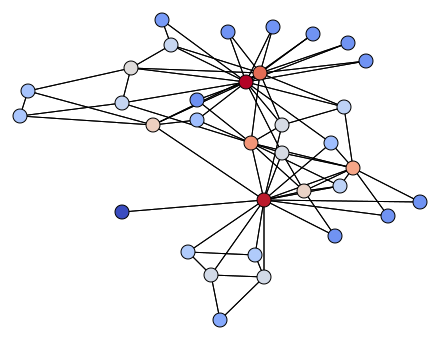

In [11]:
image = svg_graph(adjacency, position, scores=np.log(scores))

SVG(image)

# Ranking with personalization

In [12]:
seeds = {1: 1, 10: 1}

scores = pagerank.fit_transform(adjacency, seeds)

image = svg_graph(adjacency, position, scores=np.log(scores), seeds=seeds)

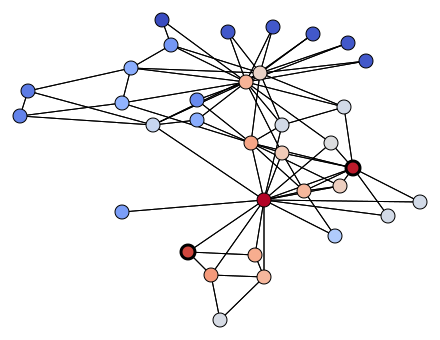

In [13]:
SVG(image)

# Digraphs

In [14]:
graph = painters(metadata=True)
adjacency = graph.adjacency
names = graph.names
position = graph.position

In [15]:
M=adjacency
print(M)

  (0, 3)	True
  (0, 10)	True
  (1, 3)	True
  (1, 12)	True
  (2, 9)	True
  (3, 0)	True
  (3, 1)	True
  (3, 7)	True
  (3, 11)	True
  (3, 12)	True
  (4, 2)	True
  (4, 5)	True
  (4, 9)	True
  (5, 2)	True
  (5, 4)	True
  (5, 8)	True
  (5, 9)	True
  (6, 0)	True
  (6, 13)	True
  (7, 1)	True
  (7, 2)	True
  (7, 3)	True
  (7, 8)	True
  (7, 11)	True
  (7, 12)	True
  (8, 0)	True
  (8, 1)	True
  (8, 4)	True
  (8, 5)	True
  (8, 7)	True
  (8, 10)	True
  (8, 11)	True
  (9, 2)	True
  (9, 4)	True
  (10, 0)	True
  (10, 3)	True
  (10, 8)	True
  (10, 11)	True
  (10, 12)	True
  (11, 0)	True
  (11, 1)	True
  (11, 3)	True
  (11, 10)	True
  (11, 12)	True
  (12, 1)	True
  (12, 3)	True
  (12, 4)	True
  (12, 7)	True
  (13, 6)	True
  (13, 8)	True


# Ranking

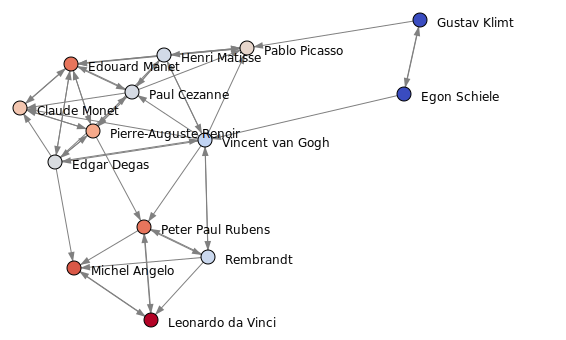

In [16]:
pagerank = PageRank()
scores = pagerank.fit_transform(adjacency)

image = svg_digraph(adjacency, position, scores=np.log(scores), names=names)
SVG(image)

In [17]:
scores

array([0.06039417, 0.06946039, 0.12498877, 0.10953832, 0.11001955,
       0.04712885, 0.01864369, 0.05308844, 0.04487283, 0.15675844,
       0.05081224, 0.05126681, 0.0843838 , 0.01864369])

In [18]:
page_rank_algo(convert_list_to_adj_matrix(M).T)

array([0.0589737 , 0.06721977, 0.12949658, 0.10588415, 0.11294411,
       0.04812794, 0.01863354, 0.05145211, 0.04459477, 0.16300046,
       0.04967294, 0.04986622, 0.08150015, 0.01863354])

# Ranking with personalization

In [19]:
cezanne = 11
seeds = {cezanne:1}

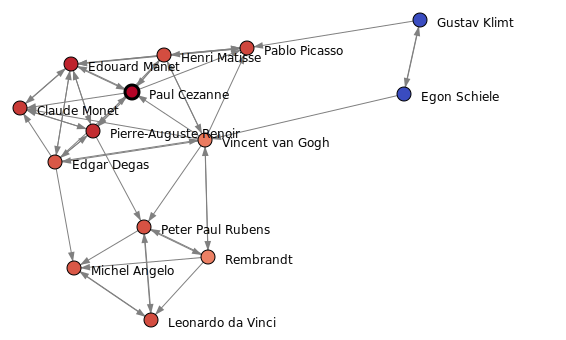

In [20]:
scores = pagerank.fit_transform(adjacency, seeds)

image = svg_digraph(adjacency, position, names, scores=np.log(scores + 1e-6), seeds=seeds)

SVG(image)

# Bigraphs

In [21]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

# Ranking

In [22]:
bipagerank = BiPageRank()

drive = 3
aviator = 9
seeds_row={drive: 1, aviator: 1}

In [23]:
bipagerank.fit(biadjacency, seeds_row)
scores_row = bipagerank.scores_row_
scores_col = bipagerank.scores_col_

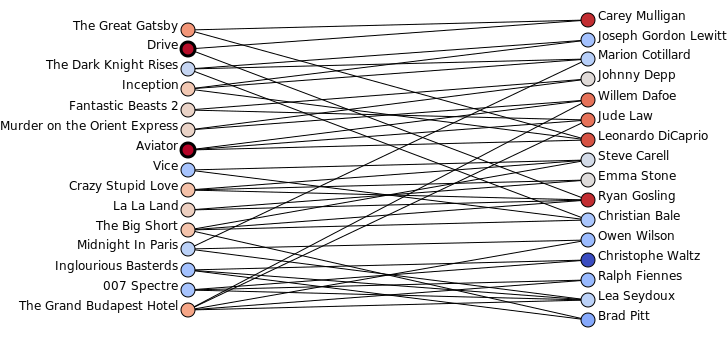

In [24]:
image = svg_bigraph(biadjacency, names_row, names_col,
                    scores_row=np.log(scores_row), scores_col=np.log(scores_col), seeds_row=seeds_row)
SVG(image)

<hr>

**Creating a directed graph and implementing PageRank**

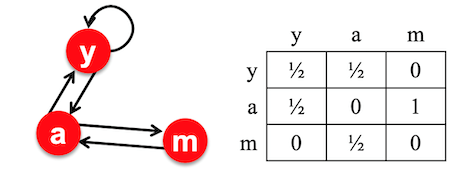

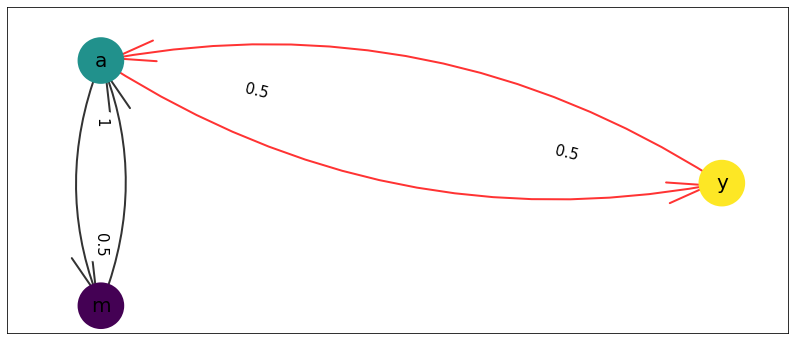


('y', {'a': {0: {'weight': 0.5}}, 'y': {0: {'weight': 0.5, 'label': 'Self loop'}}})
('a', {'y': {0: {'weight': 0.5}}, 'm': {0: {'weight': 0.5}}})
('m', {'a': {0: {'weight': 1}}})


In [25]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab

plt.figure(figsize=(14,6))
G = nx.MultiDiGraph()

G.add_edges_from([('y','a')], weight=0.5)
G.add_edges_from([('y','y')], weight=0.5, label="Self loop")
G.add_edges_from([('a','y')], weight=0.5)
G.add_edges_from([('a','m')], weight=0.5)
G.add_edges_from([('m','a')], weight=1)



val_map = {'y': 1.0,
                   'a': 0.75,
                        'm': 0.5}

values = [val_map.get(node, 0.45) for node in G.nodes()]
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
red_edges = [('y','a'),('a','y'),('y','y')]
edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]

pos=nx.circular_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,label_pos=0.25, font_size=15)
nx.draw_networkx(G,pos,node_color=values,node_size=1000,edgelist=[],font_size=20,linewidths=15)
nx.draw_networkx_edges(G, pos, connectionstyle='arc3,rad=0.2',alpha=0.8,arrowstyle='->,head_length=0.6, head_width=0.15',width=2,edge_color=edge_colors,arrowsize=70)
pylab.show()
print()
for node in G.adjacency():
  print(node)

In [26]:
# Order: y a m
S = np.array([[0.5, 0.5, 0],
              [0.5, 0, 1],
              [0, 0.5, 0]])

In [27]:
page_rank_algo(S)

array([0.3817109 , 0.39881245, 0.21947665])